In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [300]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')
# data = pd.read_csv('Resources\Heart_Disease.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Inspect data types and general info
print(data.info())


   Unnamed: 0  sex  age  education  smokingStatus  cigsPerDay  BPMeds  \
0           0  1.0   39          4            0.0           0       0   
1           1  0.0   46          2            0.0           0       0   
2           2  1.0   48          1            1.0          20       0   
3           3  0.0   61          3            1.0          30       0   
4           4  0.0   46          3            1.0          23       0   

   prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                0             0         0      195  26.97         80   
1                0             0         0      250  28.73         95   
2                0             0         0      245  25.34         75   
3                0             1         0      225  28.58         65   
4                0             0         0      285  23.10         85   

   glucose  CHDRisk         MAP  
0       77        0   82.000000  
1       76        0   94.333333  
2       70        0 

In [301]:
# data = data.drop(columns = ['MAP'])
# data

In [302]:
# # Last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -2].values

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [303]:
X_train_scaled.shape, len(X_train_scaled[0]), y_train.shape

((2909, 15), 15, (2909,))

In [304]:
# Define the model
input_features_total = len(X_train_scaled[0])
nodes_layer1 = 32
nodes_layer2 = 32
nodes_layer3 = 5

model = tf.keras.models.Sequential()

# First layer
model.add(tf.keras.layers.Dense(units=nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second layer
model.add(tf.keras.layers.Dense(units=nodes_layer2, activation = "relu"))

# Third layer
model.add(tf.keras.layers.Dense(units=nodes_layer3, activation = "relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model.summary()



# # Create the Keras Sequential model
# model = Sequential()

# # Add layers
# model.add(Dense(units=94, activation='relu', input_shape=(X_train.shape[1],)))
# # model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))

# # Print model summary
# model.summary()


c:\Users\tylio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)               │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,739 (6.79 KB)

 Non-trainable params: 0 (0.00 B)

In [305]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled,y_train,epochs=5)


# # Compile the Sequential model together and customize metrics
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Fit the model to the training data
# heart_model = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8003 - loss: 0.5774
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9807 - loss: 0.1448
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0269
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0068
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 1.0000 - loss: 0.0036


In [306]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0039
Loss: 0.003927865996956825, Accuracy: 1.0


In [307]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Accuracy: {test_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0029 
Test Accuracy: 1.0


In [308]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) if it's a classification problem
predictions = (predictions > 0.5).astype(int)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: >

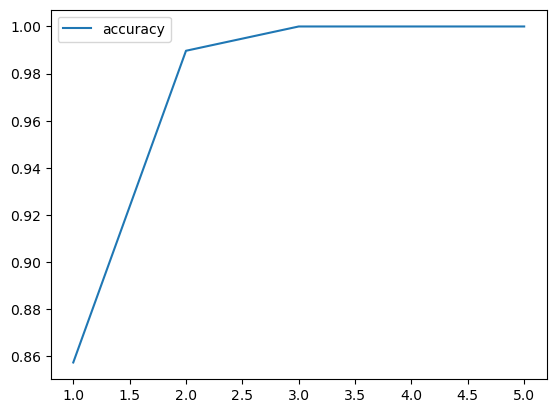

In [309]:
#plot the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
accuracy_df.plot(y = 'accuracy')

   Unnamed: 0  sex  age  education  smokingStatus  cigsPerDay  BPMeds  \
0           0  1.0   39          4            0.0           0       0   
1           1  0.0   46          2            0.0           0       0   
2           2  1.0   48          1            1.0          20       0   
3           3  0.0   61          3            1.0          30       0   
4           4  0.0   46          3            1.0          23       0   

   prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                0             0         0      195  26.97         80   
1                0             0         0      250  28.73         95   
2                0             0         0      245  25.34         75   
3                0             1         0      225  28.58         65   
4                0             0         0      285  23.10         85   

   glucose  CHDRisk         MAP  
0       77        0   82.000000  
1       76        0   94.333333  
2       70        0 

c:\Users\tylio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)               │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,739 (6.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6920 - loss: 0.6035 - val_accuracy: 0.8986 - val_loss: 0.2363
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9354 - loss: 0.1822 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0024
23/23 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0041
Loss: 0.004146209917962551, Accuracy: 1.0
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       126

    accuracy                           1.00       72

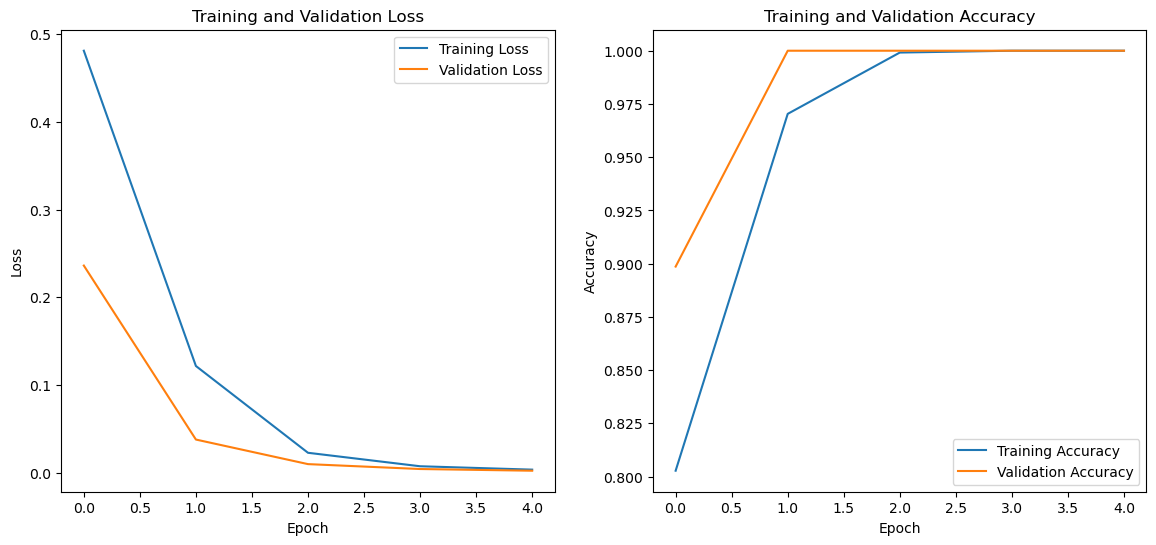

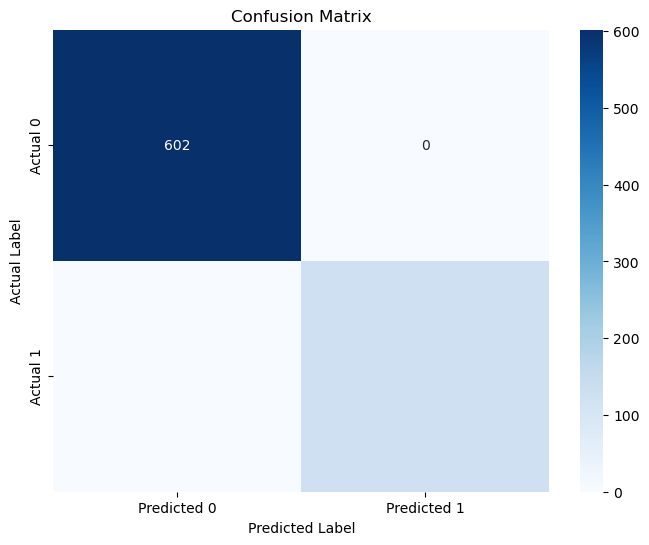

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Inspect data types and general info
print(data.info())

# Last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -2].values

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape, len(X_train_scaled[0]), y_train.shape

# Define the model
input_features_total = len(X_train_scaled[0])
nodes_layer1 = 32
nodes_layer2 = 32
nodes_layer3 = 5

model = Sequential()

# First layer
model.add(Dense(units=nodes_layer1, input_dim=input_features_total, activation="relu"))

# Second layer
model.add(Dense(units=nodes_layer2, activation="relu"))

# Third layer
model.add(Dense(units=nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model.summary()

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Make predictions
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) if it's a classification problem
predictions = (predictions > 0.5).astype(int)

# Plot the accuracy and loss over epochs
def plot_training_history(history):
    history_df = pd.DataFrame(history.history)
    history_df['epoch'] = history.epoch

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    if 'val_loss' in history_df:
        plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_df:
        plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

# Confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Print classification report
print("Classification Report")
print(classification_report(y_test, predictions))

# Plotting training history
plot_training_history(fit_model)

# Plotting confusion matrix
plot_confusion_matrix(y_test, predictions)
